In [5]:
import pandas as pd
import numpy as np
import tushare as ts
import matplotlib.pyplot as plt
%matplotlib inline

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


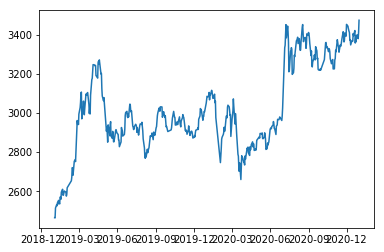

In [10]:
# 以上证指数为例
df = ts.get_hist_data('sh', start='2019-01-01', end='2020-12-31')
price = df['close'].sort_index()
price.index = pd.to_datetime(price.index)
plt.plot(price)

#### 我们可以从两个视角来验证一个价格序列是否存在均值回归，或者说是平稳的(stationary)
1. 价格在下一个时点的波动与当前时点价格偏离均值的程度成正比，ADF Test正是用来检验是否存在这样的正比关系（即系数是否为0）
2. 更加数学的角度来看，价格序列取对数之后，其方差的增长速度相对于时间是一个sublinear function，可以用variance ratio test来做验证

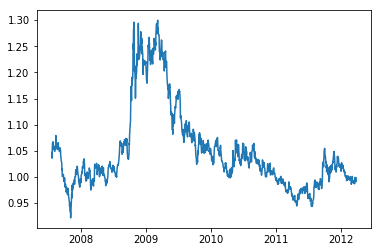

In [18]:
from dateutil.parser import parse

df = pd.read_csv('./USD_CAD.csv')
df['date'] = df['日期'].apply(lambda x: parse(x.replace('年', '-').replace('月', '-').replace('日', '-')))
p_usdcad = df.set_index('date')['收盘']
plt.plot(p_usdcad)

In [23]:
# ADF Test
from statsmodels.tsa.stattools import adfuller

res = adfuller(p_usdcad.values, maxlag=1, regression='c')
adf, pvalue, *_ = res

(-1.9583416873642796, 0.3051320474200423)

可以看到adf是负数，代表序列至少不是趋势性的，但是pvalue不够显著

In [ ]:
# P47 half life